<a href="https://colab.research.google.com/github/BRIGHTZX/Akkaracha-s-Blog/blob/main/Copy_of_detectTeethKud4_0NewEditionOriginal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before you start
Let's make sure that we have access to GPU. We can use nvidia-smi command to do that. In case of any problems navigate to Edit -> Notebook settings -> Hardware accelerator, set it to GPU, and then click Save.

In [ ]:
!nvidia-smi

Tue Dec  3 14:13:14 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


**Install YOLO11**

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

**Import dataset from robolfow**

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="hRVo2Mk4quAZ1AIUpKgL")
project = rf.workspace("dental-lpa8m").project("test_teeth")
version = project.version(20)
dataset = version.download("yolov11")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.9 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to test_teeth-20 in yolov11:: 100%|██████████| 1572/1572 [00:00<00:00, 4326.82it/s]


# **Custom Training**

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolo11s-seg.pt data={dataset.location}/data.yaml epochs=10 imgsz=800 plots=True

/content
100% 19.7M/19.7M [00:00<00:00, 161MB/s]
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolo11s-seg.pt, data=/content/datasets/test_teeth-20/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf

/content


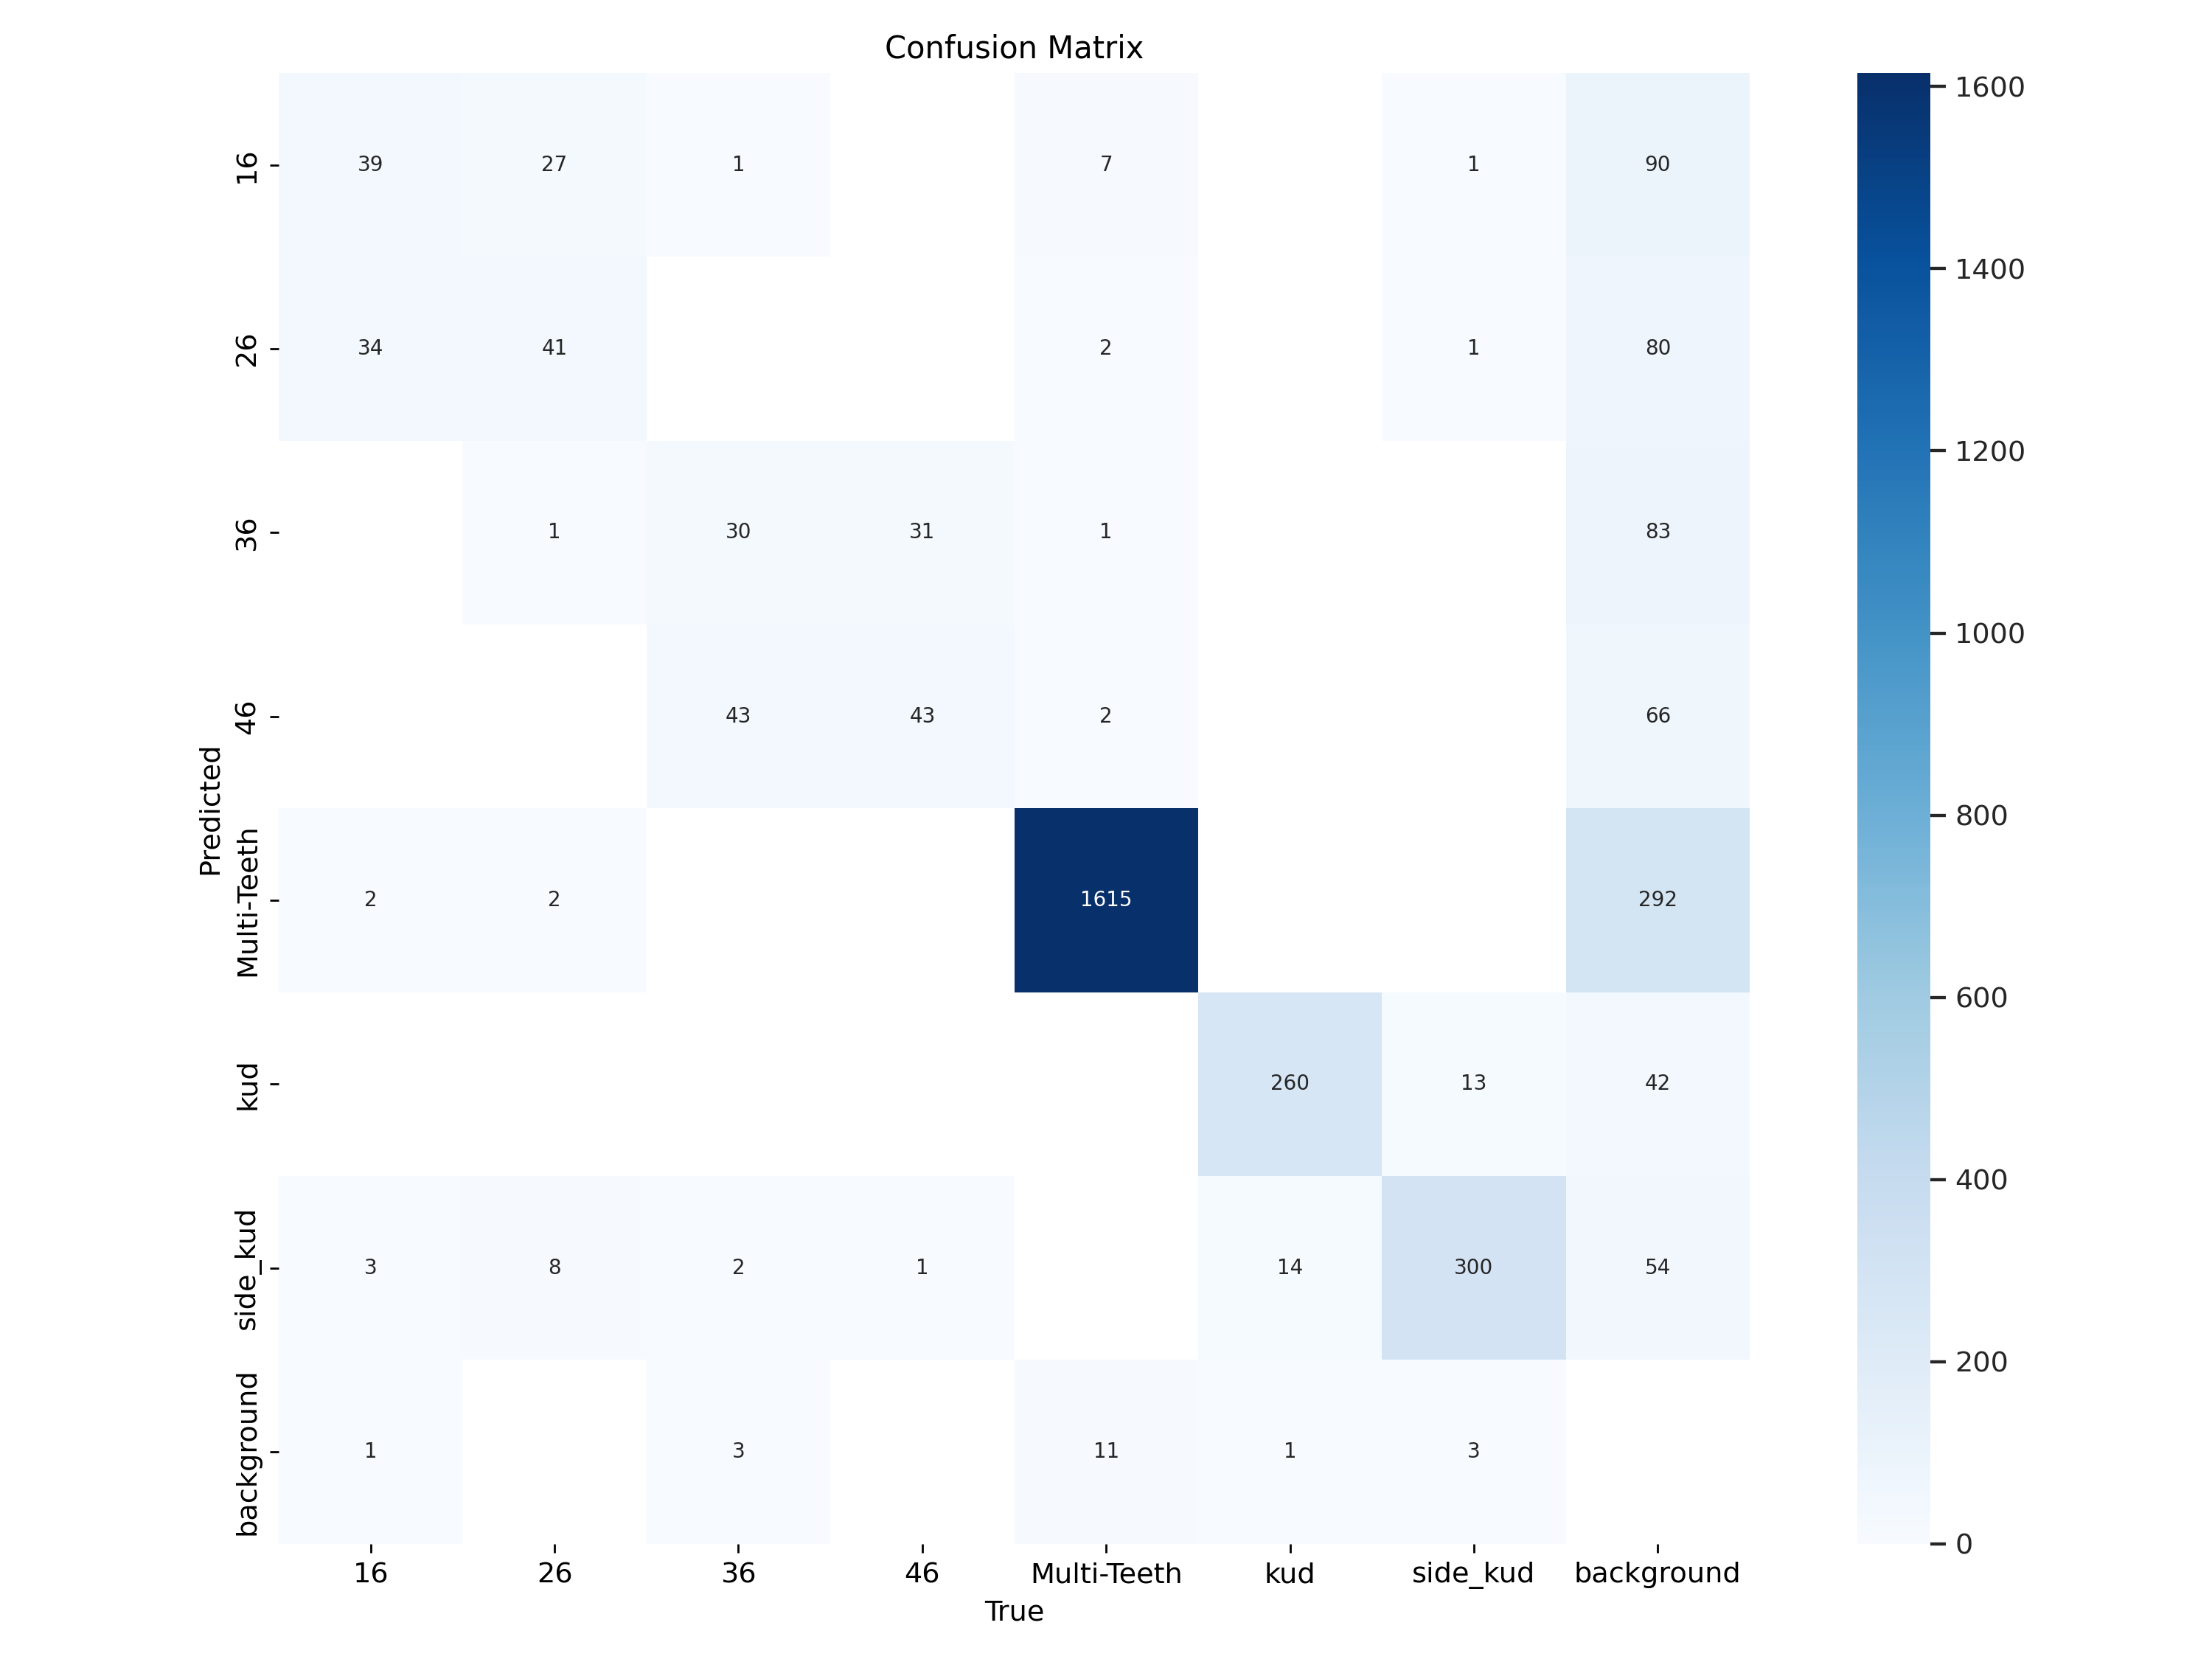

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

/content


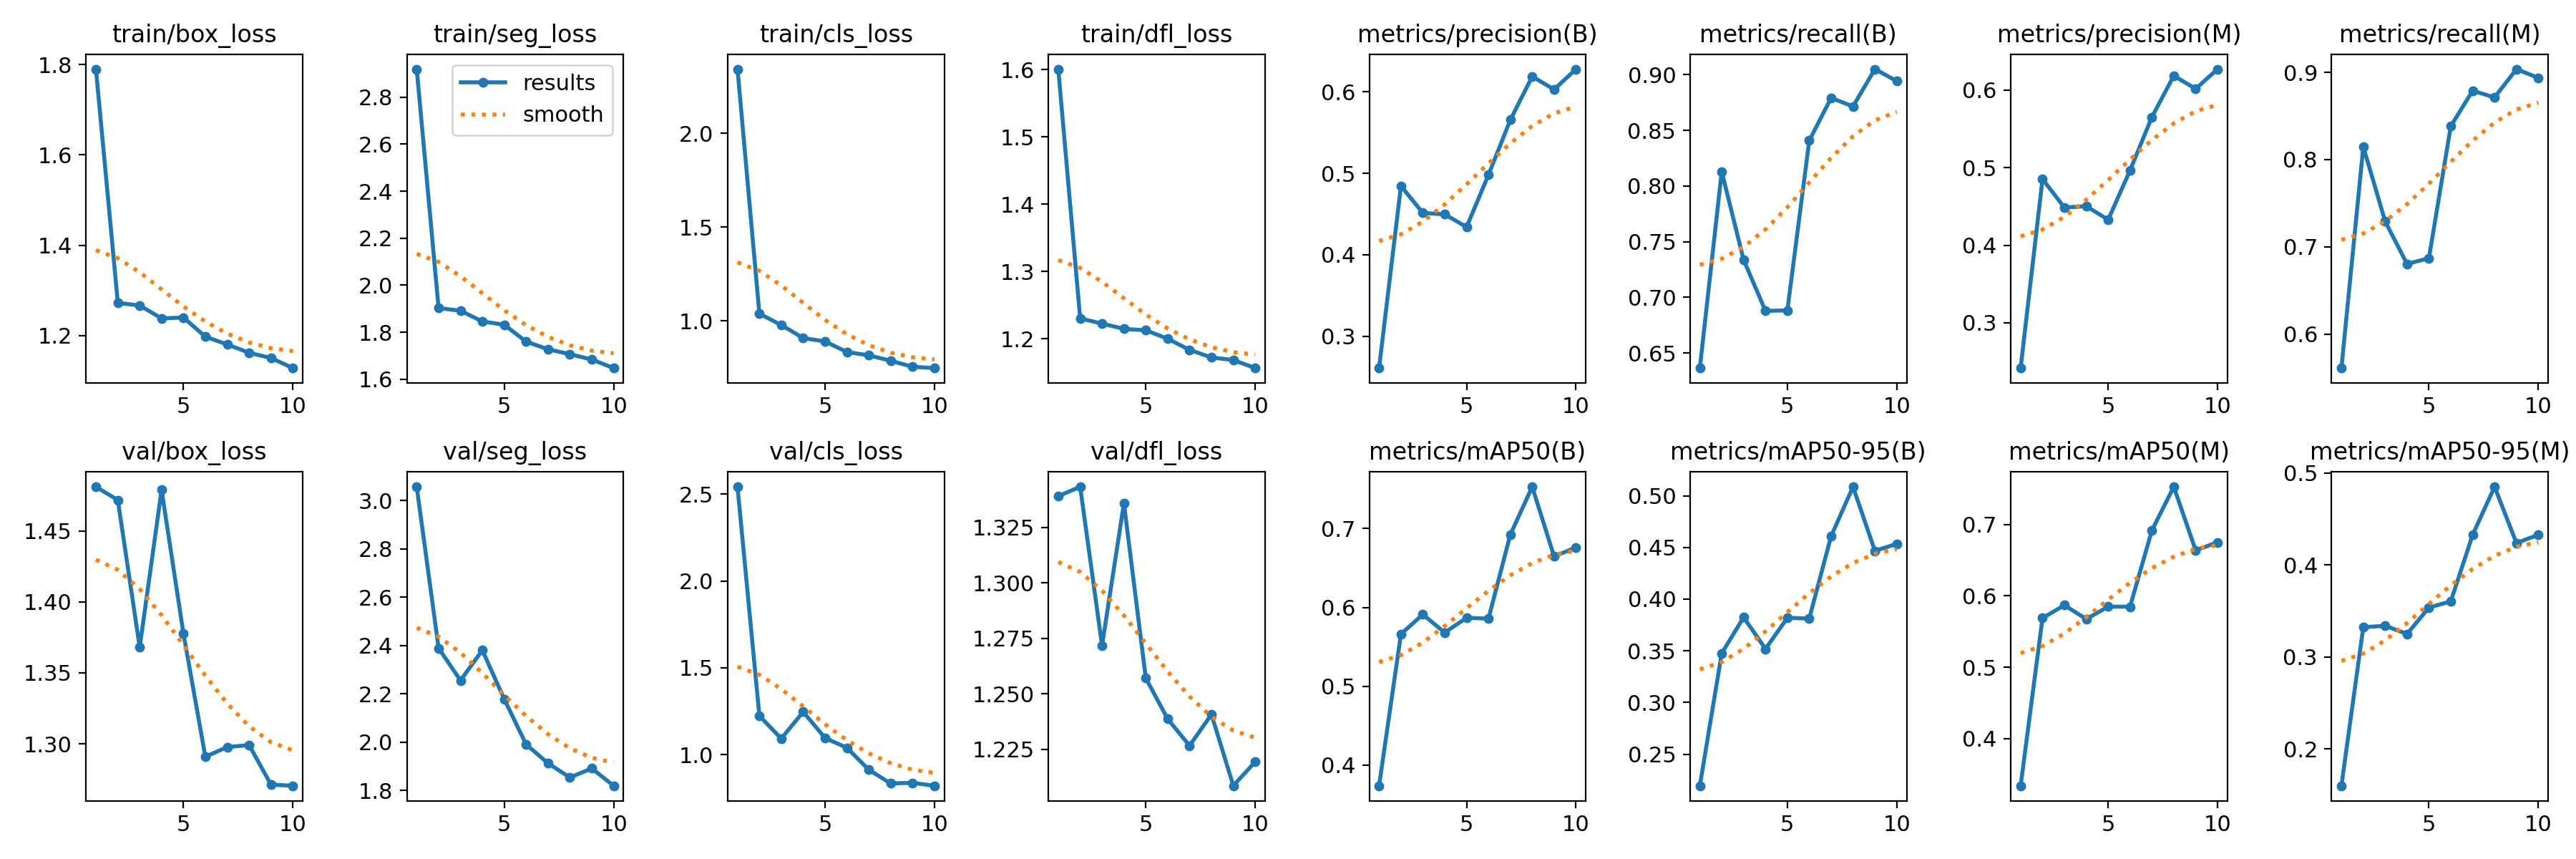

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

/content


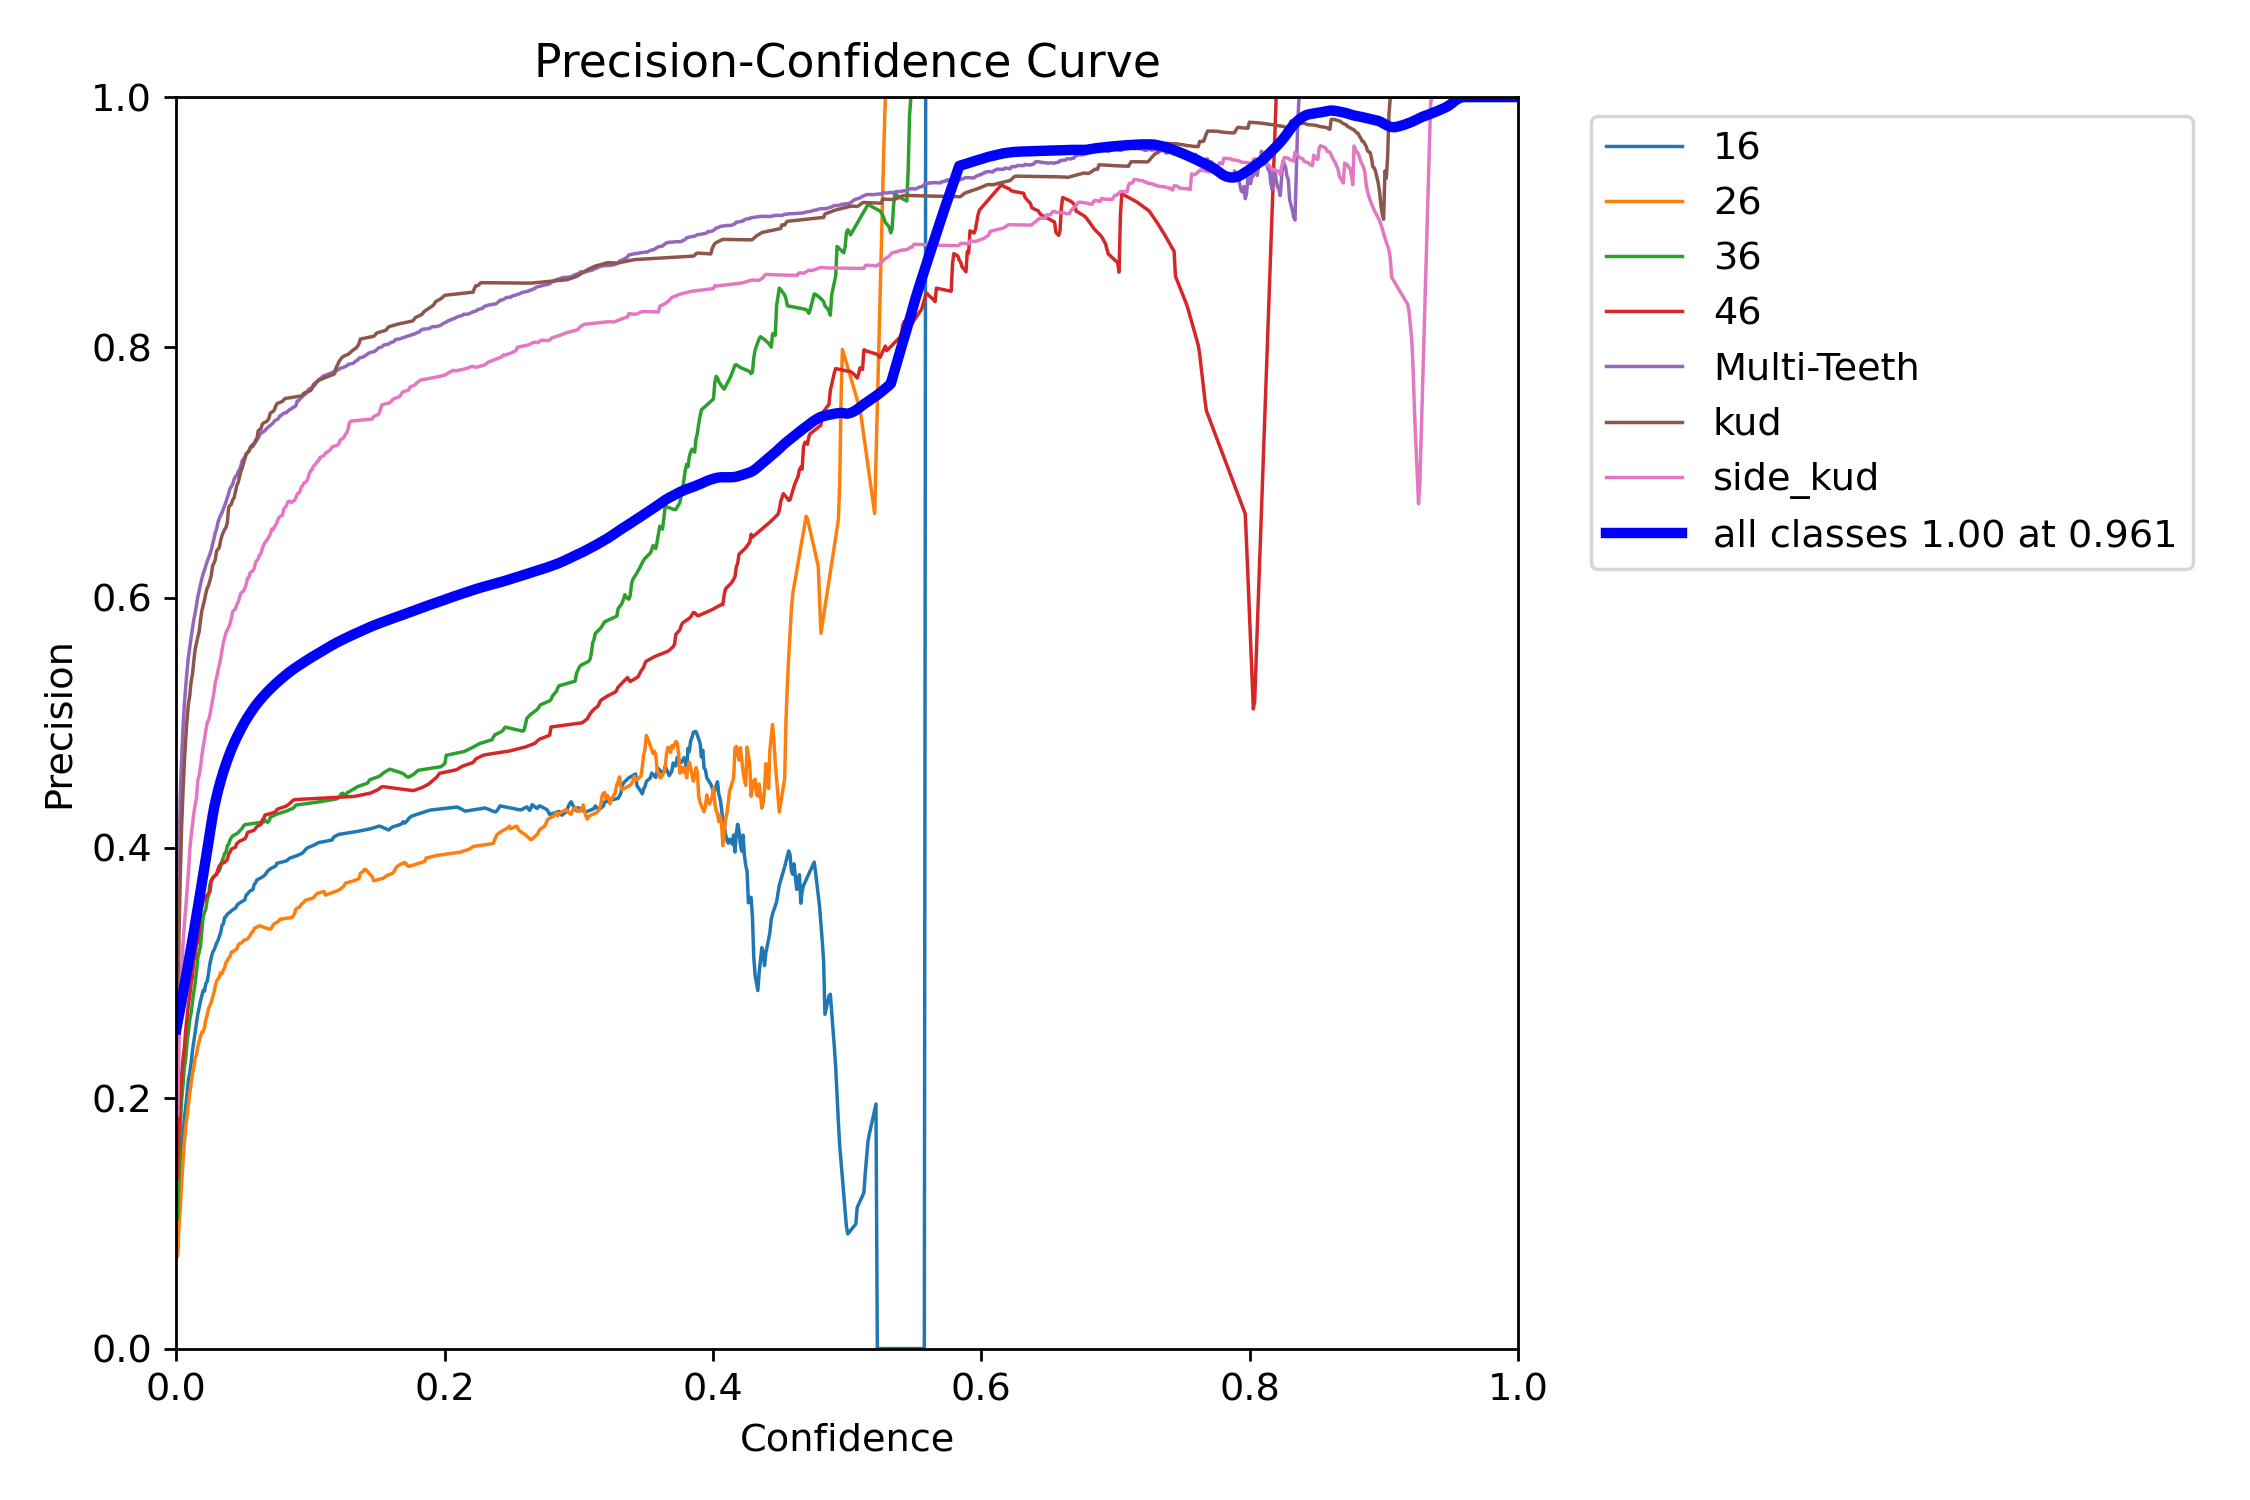

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/BoxP_curve.png', width=600)

/content


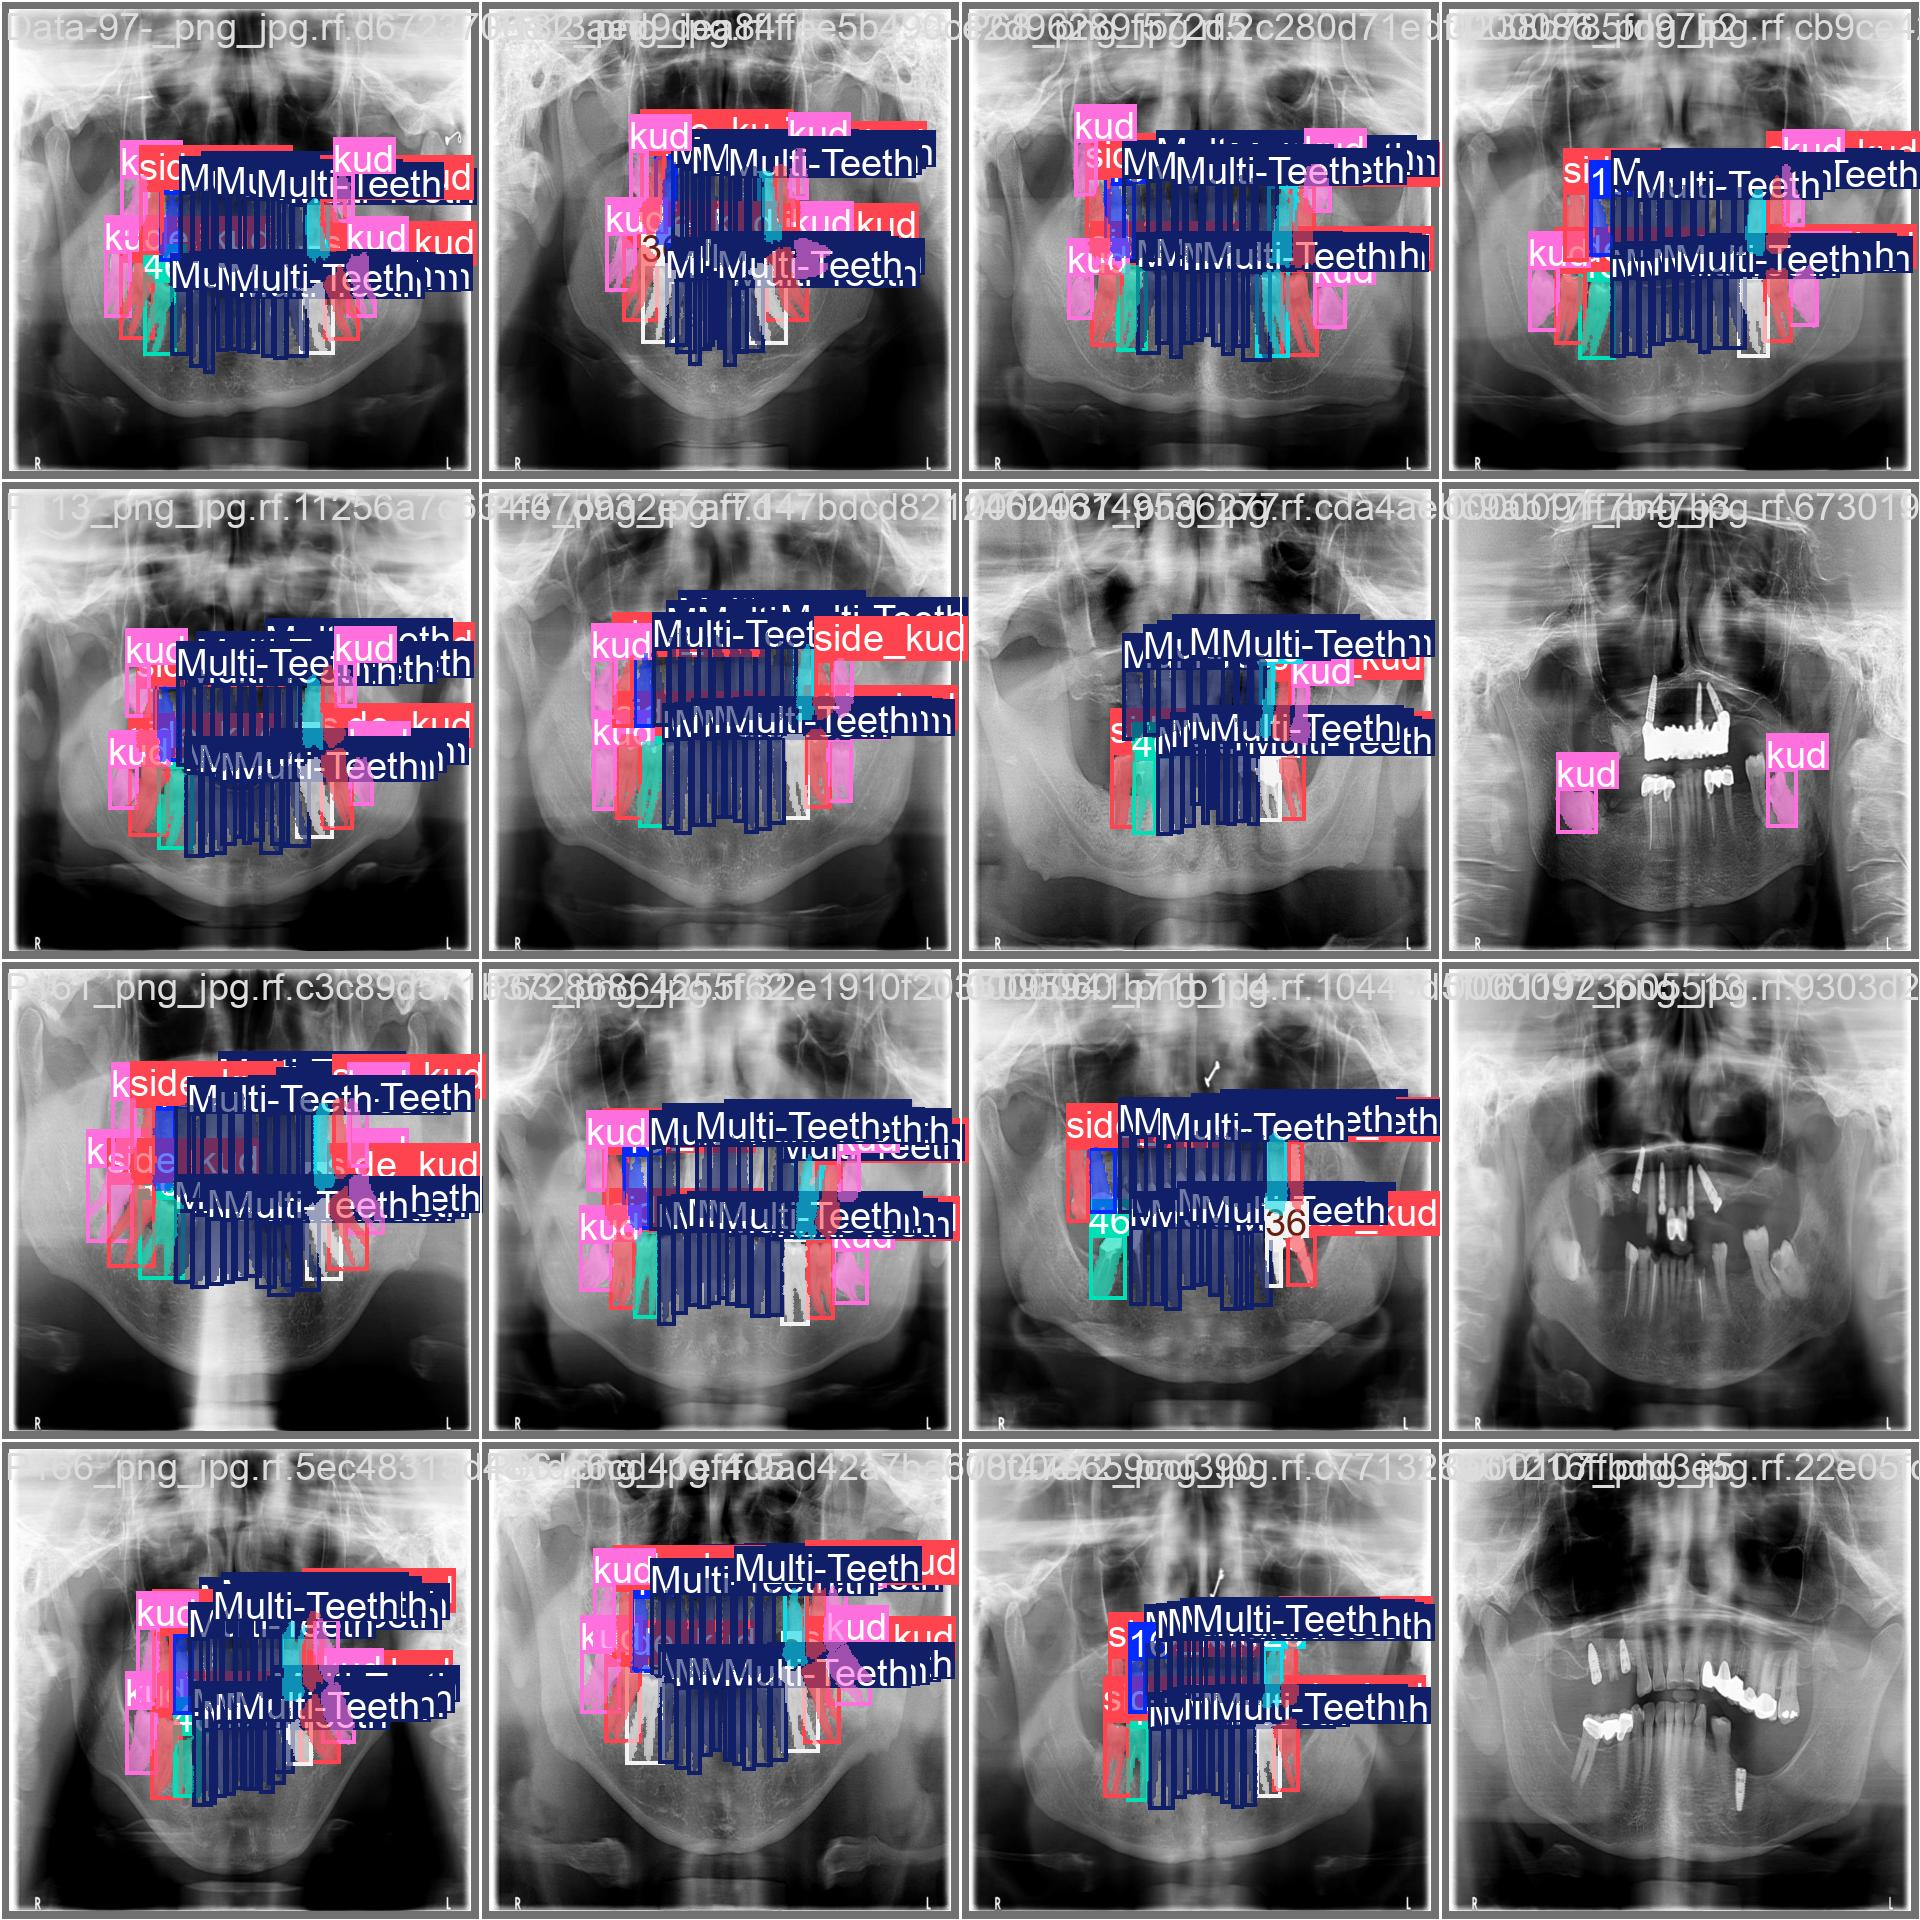

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_labels.jpg', width=600)

## **Validate Custom Model**

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s-seg summary (fused): 265 layers, 10,069,525 parameters, 0 gradients, 35.3 GFLOPs
val: Scanning /content/datasets/test_teeth-20/valid/labels.cache... 98 images, 7 backgrounds, 0 corrupt: 100% 98/98 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 7/7 [00:10<00:00,  1.44s/it]
                   all         98       2543      0.663      0.823       0.76       0.52      0.662      0.823      0.759      0.488
                    16         79         79      0.519      0.696      0.572       0.35      0.519      0.696      0.572      0.347
                    26         78         79       0.47      0.583      0.591      0.368       0.47      0.583      0.591      0.389
                    36         76         79      0.479      0.897      0.635       0.47      0.479      0.897      0.63

# **Inference with Custom Model**

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s-seg summary (fused): 265 layers, 10,069,525 parameters, 0 gradients, 35.3 GFLOPs

image 1/44 /content/datasets/test_teeth-20/test/images/0000032_png_jpg.rf.194433ae3c754676273c901e959b3904.jpg: 800x800 2 16s, 2 26s, 19 Multi-Teeths, 5 kuds, 4 side_kuds, 28.7ms
image 2/44 /content/datasets/test_teeth-20/test/images/0000078_png_jpg.rf.315c2d1bc88c87ef16226b30952337aa.jpg: 800x800 1 16, 2 36s, 19 Multi-Teeths, 4 kuds, 4 side_kuds, 28.6ms
image 3/44 /content/datasets/test_teeth-20/test/images/0000160_png_jpg.rf.74203e04f0d0471da3efcc1dfef790dc.jpg: 800x800 1 26, 1 36, 21 Multi-Teeths, 2 kuds, 3 side_kuds, 28.6ms
image 4/44 /content/datasets/test_teeth-20/test/images/0000178_png_jpg.rf.264885b64dbac640fbec7ff558e2f61a.jpg: 800x800 1 16, 1 26, 2 36s, 20 Multi-Teeths, 4 kuds, 4 side_kuds, 28.6ms
image 5/44 /content/datasets/test_teeth-20/test/images/0000205_png_jpg.rf.dd5c3f170c7a742c395ac74fd9a

# **Result Predict**

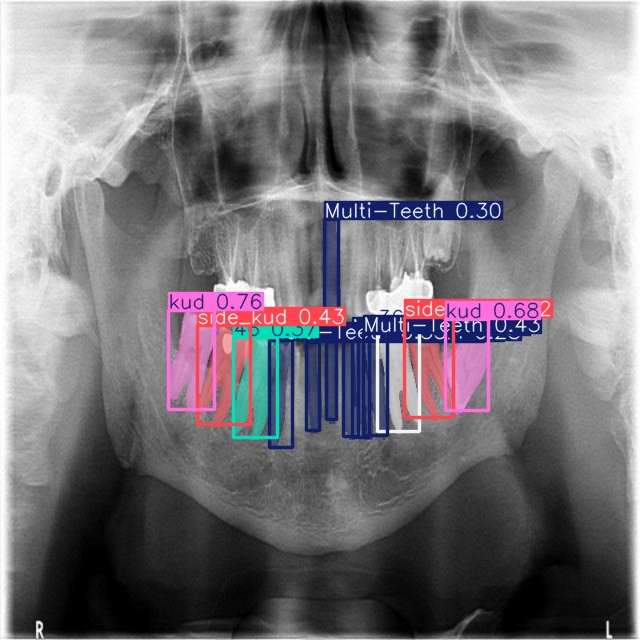

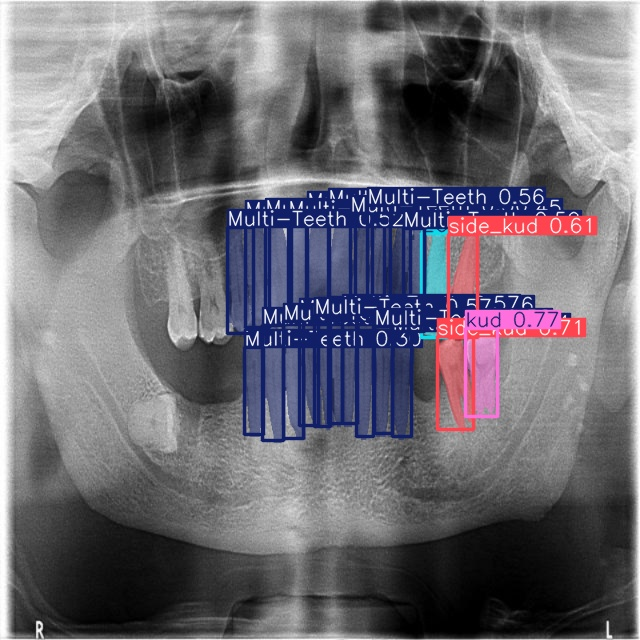

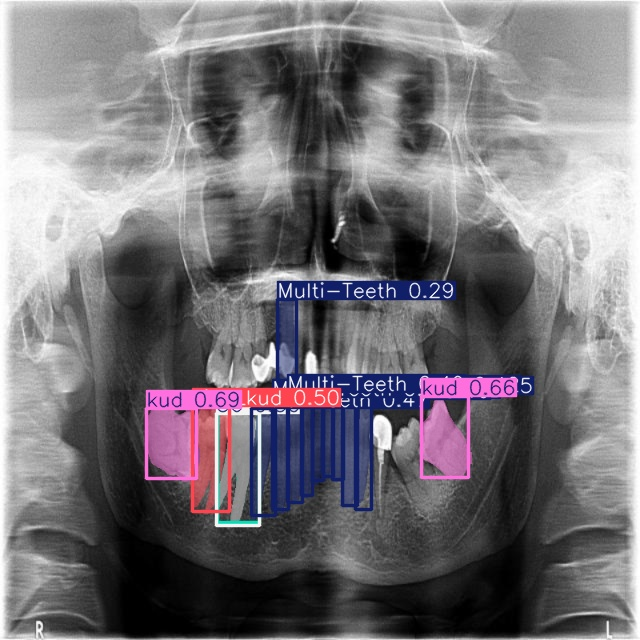

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/segment/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

# **Deploy model on Roboflow**

In [ ]:
# project.version(dataset.version).deploy(model_type="yolov11", model_path=f"{HOME}/runs/segment/train/")

View the status of your deployment at: https://app.roboflow.com/dental-lpa8m/test_teeth/19
Share your model with the world at: https://universe.roboflow.com/dental-lpa8m/test_teeth/model/19


In [ ]:
# #Run inference on your model on a persistant, auto-scaling, cloud API

# #load model
# model = project.version(dataset.version).model

# #choose random test set image
# import os, random
# test_set_loc = dataset.location + "/test/images/"
# random_test_image = random.choice(os.listdir(test_set_loc))
# print("running inference on " + random_test_image)

# pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
# pred

NameError: name 'project' is not defined

In [ ]:
# !gdown "https://drive.google.com/file/d/1vmUMJrVzcn58ZScL2DwmH3Zk_Q5_khRT/view?usp=drive_link"

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1vmUMJrVzcn58ZScL2DwmH3Zk_Q5_khRT
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1vmUMJrVzcn58ZScL2DwmH3Zk_Q5_khRT/view?usp=drive_link
To: /content/view?usp=drive_link
8.93kB [00:00, 19.1MB/s]


In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source=447.jpg save=True

/content
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s-seg summary (fused): 265 layers, 10,069,525 parameters, 0 gradients, 35.3 GFLOPs

image 1/1 /content/447.jpg: 416x800 2 16s, 2 46s, 16 Multi-Teeths, 3 kuds, 4 side_kuds, 63.2ms
Speed: 4.2ms preprocess, 63.2ms inference, 621.5ms postprocess per image at shape (1, 3, 416, 800)
Results saved to runs/segment/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


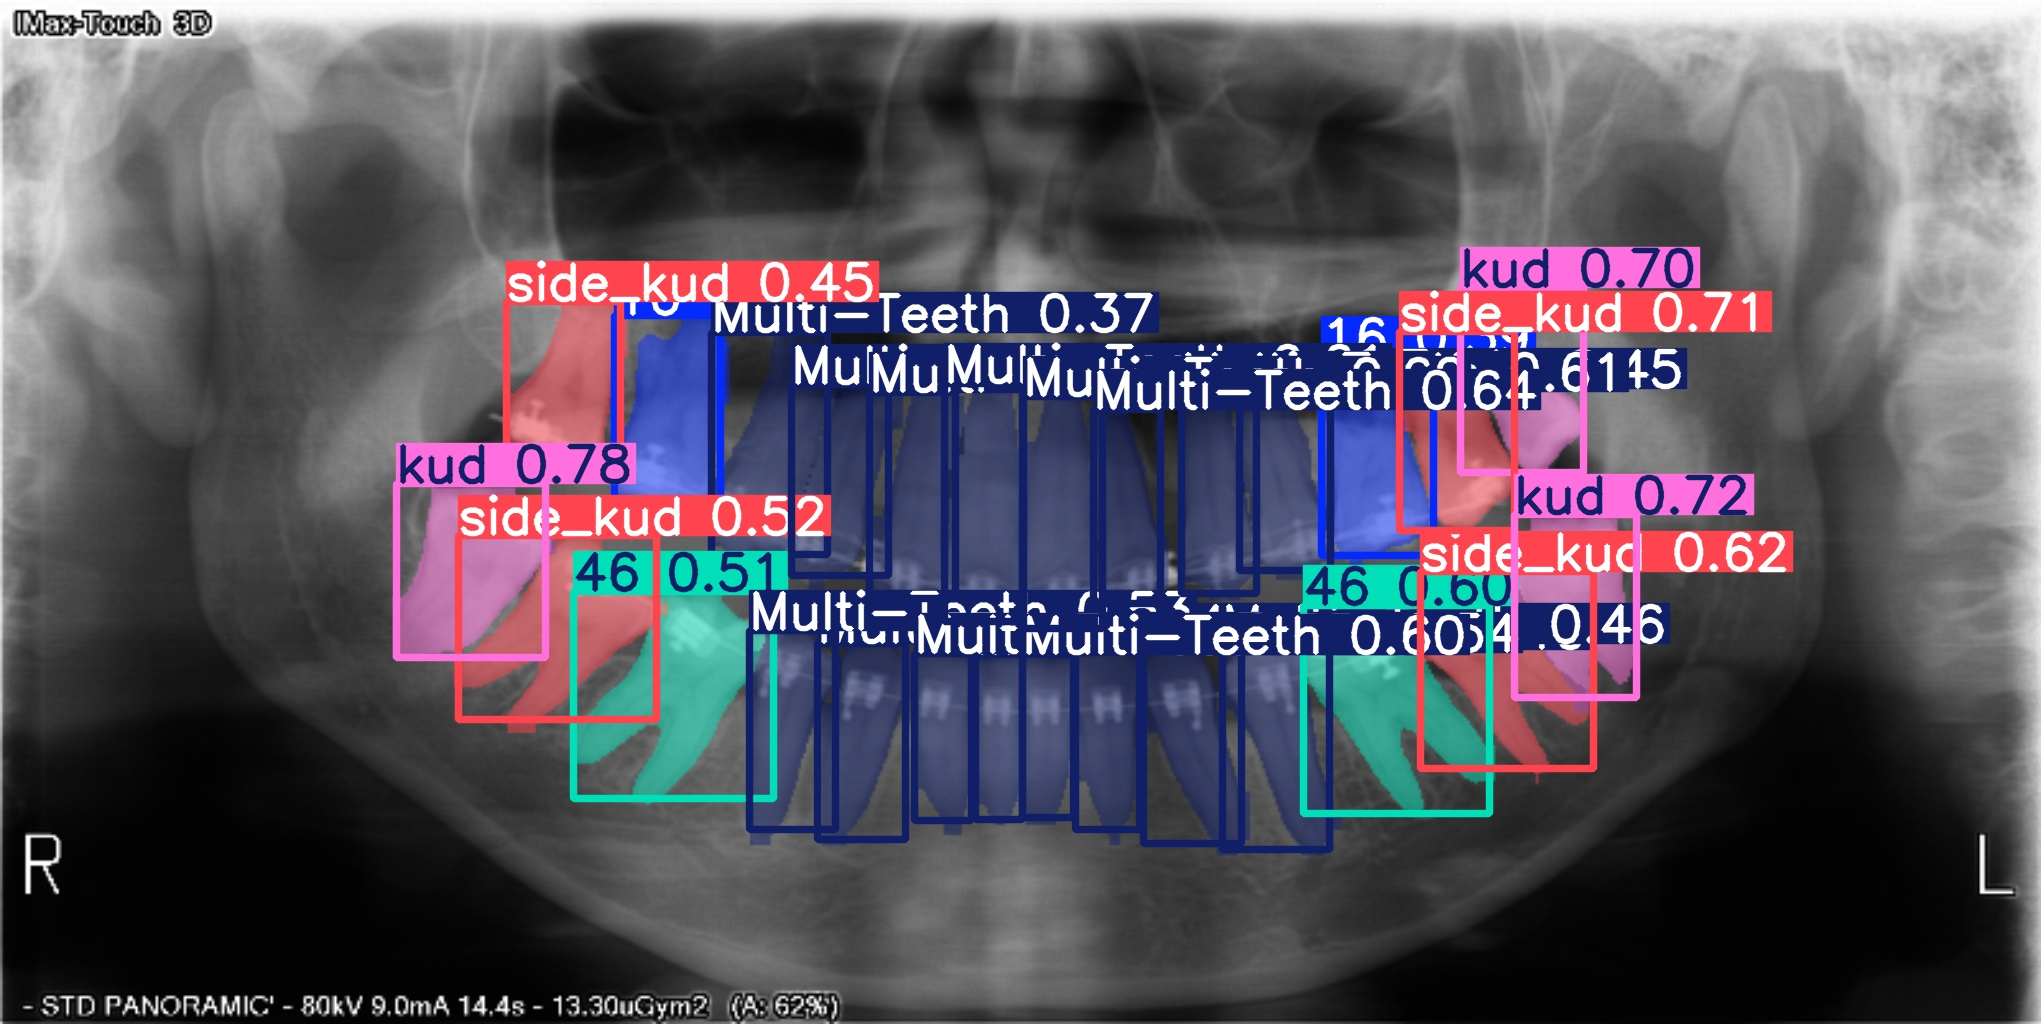

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/predict2/447.jpg', width=600)

OBB